### Add primary imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

#### Read csv by pandas

In [3]:
df = pd.read_csv("housePrice.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


#### Filltering Datas
- by dropna remove nulls values
- replace True False to 1 0

In [4]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce') 
print (df["Area"].dtype)
df = df.dropna() # delet nulls
df = df.replace(True,1)
df = df.replace(False,0)
# df.describe() # to describe Datas
df

# ------------------------------------------------------------------------- it can be usefull 
# df['Area'] = df['Area'].str.replace('"', '').astype(float)
# pd.to_numeric(df["Area"], downcast='int')
# df['Area'] = df['Area'].astype(float)

float64


C:\Users\RGN\AppData\Local\Temp\ipykernel_20488\3626714974.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(False,0)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75.0,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105.0,2,1,1,1,Dorous,5.600000e+09,186666.67


#### Scatter the chart by Area Price

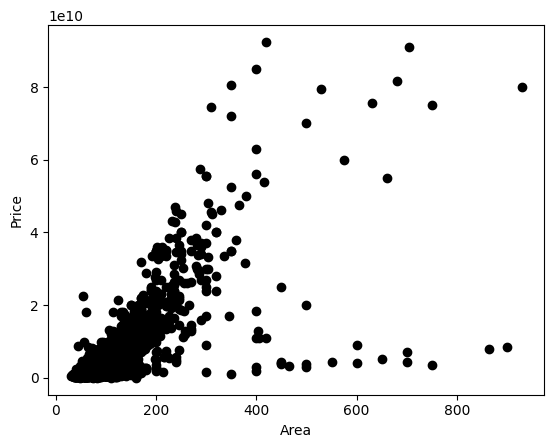

In [5]:
cdf = df[["Area","Room",'Parking','Warehouse','Elevator',"Price"]]
# cdf = cdf.sort_values(by=['Price'] ,  ascending=True)  #sort by Price


plt.scatter(cdf.Area, cdf.Price,  color='black')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

#### Group datas to train and test
- 80% ----> train
- 20% ----> test
###### ( its for testing machine to know how accurately does it predict , machin will learn by train part and we test it by test part ) 

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Multiple Regression :
### Find Coefficients

In [9]:
! pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.1 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.1 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 2.1 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.1 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.1 MB 2.1 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 1.9 MB/s eta 0:00:04
   ---------

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)          # Coefficients for x1 , x2, x3
print ('intercept_: ', regr.intercept_)       # Constant number

Coefficients:  [[ 6.91442302e+07  1.66311189e+09 -3.42663086e+08  1.26844849e+09
   1.12288230e+09]]
intercept_:  [-7.21231401e+09]


### Time for get Multy-Score

In [11]:
y_hat= regr.predict(test[['Area','Room','Parking','Warehouse','Elevator']])
x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(test[['Price']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 31017021879699300352.00
Variance score: 0.55


C:\Users\RGN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
